## Exercises

Do your work for these exercises in a jupyter notebook named `scaling`. Use the telco dataset. Once you are finished, you may wish to repeat the exercises on another dataset for additional practice.

1. Apply the scalers we talked about in this lesson to your data and visualize the results in a way that can.
2. Apply the `.inverse_transform` method to your scaled data. Is the resulting dataset the exact same as the original data?
3. Read the documentation for sklearn's `QuantileTransformer`. Use `normal` for the `output_distribution` and apply this scaler to your data. Visualize the result of your data scaling.
4. Use the `QuantileTransformer`, but omit the `output_distribution` argument. Visualize your results. What do you notice?
Based on the work you've done, choose a scaling method for your dataset. Write a function within your `prepare.py` that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import env

from sklearn.model_selection import train_test_split

import sklearn.preprocessing

import acquire
import prepare
from wrangle import wrangle_telco
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = wrangle_telco()
df.head()

,customer_id,monthly_charges,total_charges,tenure
0,0013-SMEOE,109.70,7904.25,71
1,0014-BMAQU,84.65,5377.80,63
2,0016-QLJIS,90.45,5957.90,65
3,0017-DINOC,45.20,2460.55,54
4,0017-IUDMW,116.80,8456.75,72


In [3]:
df = df.set_index("customer_id")
df.head()

,monthly_charges,total_charges,tenure
customer_id,,,
0013-SMEOE,109.70,7904.25,71
0014-BMAQU,84.65,5377.80,63
0016-QLJIS,90.45,5957.90,65
0017-DINOC,45.20,2460.55,54
0017-IUDMW,116.80,8456.75,72


In [4]:
def split(df):
    '''
    take in a DataFrame and return train, validate, and test DataFrames.
    return train, validate, test DataFrames.
    '''
    train_validate, test = train_test_split(df, test_size=.2, random_state=123)
    train, validate = train_test_split(train_validate, 
                                       test_size=.3, 
                                       random_state=123)
    return train, validate, test

In [5]:
train, validate, test = split(df)
print(f'train -> {train.shape}')
print(f'validate -> {validate.shape}')
print(f'test -> {test.shape}')
train.head()

train -> (949, 3)
validate -> (407, 3)
test -> (339, 3)


,monthly_charges,total_charges,tenure
customer_id,,,
7501-IWUNG,73.80,4616.05,61
1303-SRDOK,69.05,3842.60,55
3967-VQOGC,24.90,1680.25,67
3777-XROBG,19.55,1079.65,58
5075-JSDKI,24.45,1493.10,59


### 1. Apply the scalers we talked about in this lesson to your data and visualize the results in a way that can 

Text(0.5, 1.0, 'Scaled')

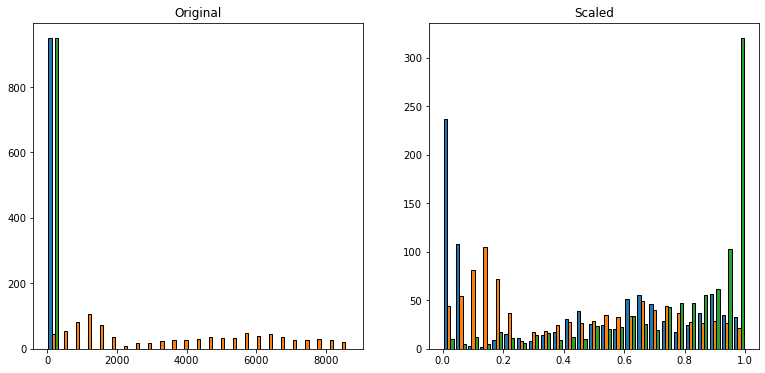

In [6]:
#make the thing (Min-Max Scaling)
scaler = sklearn.preprocessing.MinMaxScaler()

#fit the thing 
scaler.fit(train)
#Note: only call .fit w/ the training data, but use .transform to apply the scaling to all the data splits.


#use the thing
train_scaled = scaler.transform(train) 
validate_scaled = scaler.transform(validate)
test_scaled = scaler.transform(test)

# turn the numpy arrays into dataframes
train_scaled = pd.DataFrame(train_scaled, columns=train.columns)
validate_scaled = pd.DataFrame(validate_scaled, columns=train.columns)
test_scaled = pd.DataFrame(test_scaled, columns=train.columns)


plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_scaled, bins=25, ec='black')
plt.title('Scaled')

Text(0.5, 1.0, 'Scaled Monthly Charges')

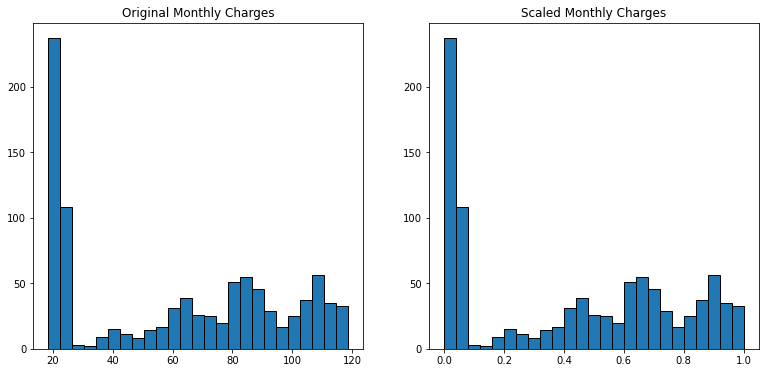

In [7]:
#make the thing (Min-Max Scaling)
scaler = sklearn.preprocessing.MinMaxScaler()

#fit the thing 
scaler.fit(train)
#Note: only call .fit w/ the training data, but use .transform to apply the scaling to all the data splits.


#use the thing
train_scaled = scaler.transform(train) 
validate_scaled = scaler.transform(validate)
test_scaled = scaler.transform(test)

#or one step to fit and transform:
# train_scaled = scaler.fit_transform(train[['monthly_charges']])

# turn the numpy arrays into dataframes
train_scaled = pd.DataFrame(train_scaled, columns=train.columns)
validate_scaled = pd.DataFrame(validate_scaled, columns=train.columns)
test_scaled = pd.DataFrame(test_scaled, columns=train.columns)

#visualize
plt.figure(figsize=(13, 6))

plt.subplot(121)
plt.hist(train.monthly_charges, bins=25, ec='black')
plt.title('Original Monthly Charges')

plt.subplot(122)
plt.hist(train_scaled.monthly_charges, bins=25, ec='black')
plt.title('Scaled Monthly Charges')

Text(0.5, 1.0, 'Scaled Monthly Charges')

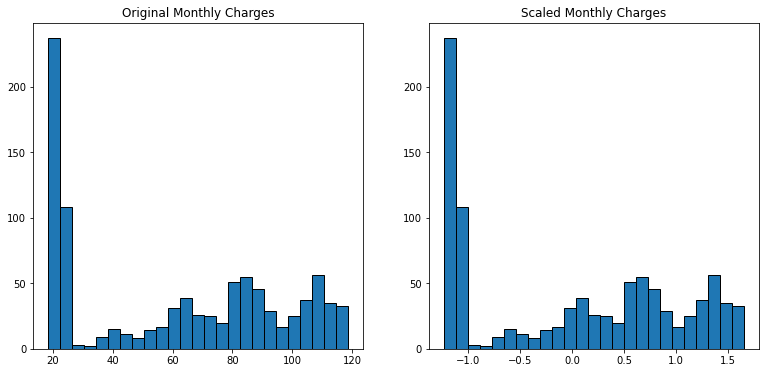

In [8]:
#make the thing (Standard Scaling)
scaler = sklearn.preprocessing.StandardScaler()

#fit the thing 
scaler.fit(train)
#Note: only call .fit w/ the training data, but use .transform to apply the scaling to all the data splits.


#use the thing
train_scaled = scaler.transform(train)
validate_scaled = scaler.transform(validate)
test_scaled = scaler.transform(test)

# turn the numpy arrays into dataframes
train_scaled = pd.DataFrame(train_scaled, columns=train.columns)
validate_scaled = pd.DataFrame(validate_scaled, columns=train.columns)
test_scaled = pd.DataFrame(test_scaled, columns=train.columns)

#visualize 
plt.figure(figsize=(13, 6))

plt.subplot(121)
plt.hist(train.monthly_charges, bins=25, ec='black')
plt.title('Original Monthly Charges')

plt.subplot(122)
plt.hist(train_scaled.monthly_charges, bins=25, ec='black')
plt.title('Scaled Monthly Charges')

Text(0.5, 1.0, 'Scaled Monthly Charges')

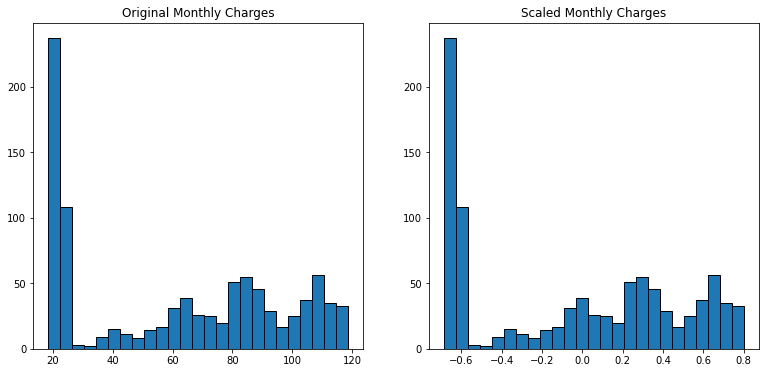

In [9]:
#make the thing (Robust Scaling)
scaler = sklearn.preprocessing.RobustScaler()

#fit the thing 
scaler.fit(train)
#Note: only call .fit w/ the training data, but use .transform to apply the scaling to all the data splits.


#use the thing
train_scaled = scaler.transform(train)
validate_scaled = scaler.transform(validate)
test_scaled = scaler.transform(test)

# turn the numpy arrays into dataframes
train_scaled = pd.DataFrame(train_scaled, columns=train.columns)
validate_scaled = pd.DataFrame(validate_scaled, columns=train.columns)
test_scaled = pd.DataFrame(test_scaled, columns=train.columns)

#visualize
plt.figure(figsize=(13, 6))

plt.subplot(121)
plt.hist(train.monthly_charges, bins=25, ec='black')
plt.title('Original Monthly Charges')

plt.subplot(122)
plt.hist(train_scaled.monthly_charges, bins=25, ec='black')
plt.title('Scaled Monthly Charges')

Text(0.5, 1.0, 'Scaled Total Charges')

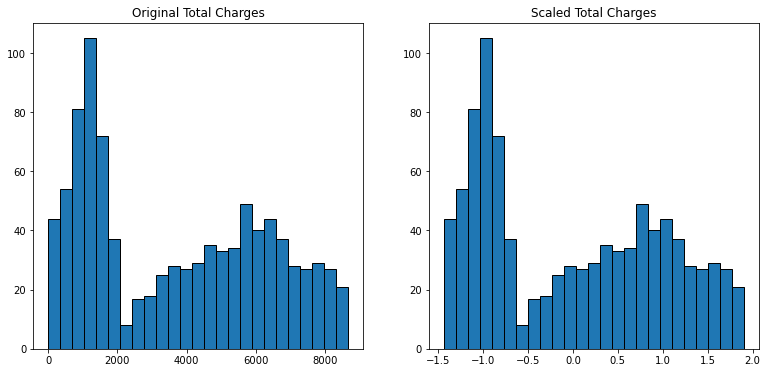

In [10]:
#make the thing (Standard Scaling)
scaler = sklearn.preprocessing.StandardScaler()

#fit the thing 
scaler.fit(train)
#Note: only call .fit w/ the training data, but use .transform to apply the scaling to all the data splits.


#use the thing
train_scaled = scaler.transform(train)
validate_scaled = scaler.transform(validate)
test_scaled = scaler.transform(test)

# turn the numpy arrays into dataframes
train_scaled = pd.DataFrame(train_scaled, columns=train.columns)
validate_scaled = pd.DataFrame(validate_scaled, columns=train.columns)
test_scaled = pd.DataFrame(test_scaled, columns=train.columns)

#visualize
plt.figure(figsize=(13, 6))

plt.subplot(121)
plt.hist(train.total_charges, bins=25, ec='black')
plt.title('Original Total Charges')

plt.subplot(122)
plt.hist(train_scaled.total_charges, bins=25, ec='black')
plt.title('Scaled Total Charges')

Text(0.5, 1.0, 'Scaled Tenure')

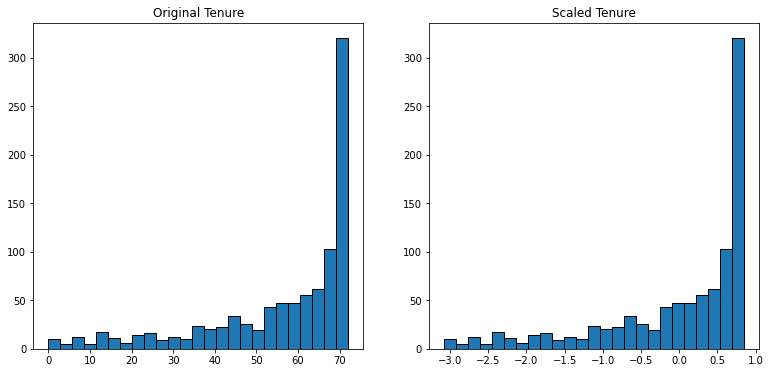

In [11]:
#make the thing (Standard Scaling)
scaler = sklearn.preprocessing.StandardScaler()

#fit the thing 
scaler.fit(train)
#Note: only call .fit w/ the training data, but use .transform to apply the scaling to all the data splits.


#use the thing
train_scaled = scaler.transform(train)
validate_scaled = scaler.transform(validate)
test_scaled = scaler.transform(test)

# turn the numpy arrays into dataframes
train_scaled = pd.DataFrame(train_scaled, columns=train.columns)
validate_scaled = pd.DataFrame(validate_scaled, columns=train.columns)
test_scaled = pd.DataFrame(test_scaled, columns=train.columns)

#visualize
plt.figure(figsize=(13, 6))

plt.subplot(121)
plt.hist(train.tenure, bins=25, ec='black')
plt.title('Original Tenure')

plt.subplot(122)
plt.hist(train_scaled.tenure, bins=25, ec='black')
plt.title('Scaled Tenure')

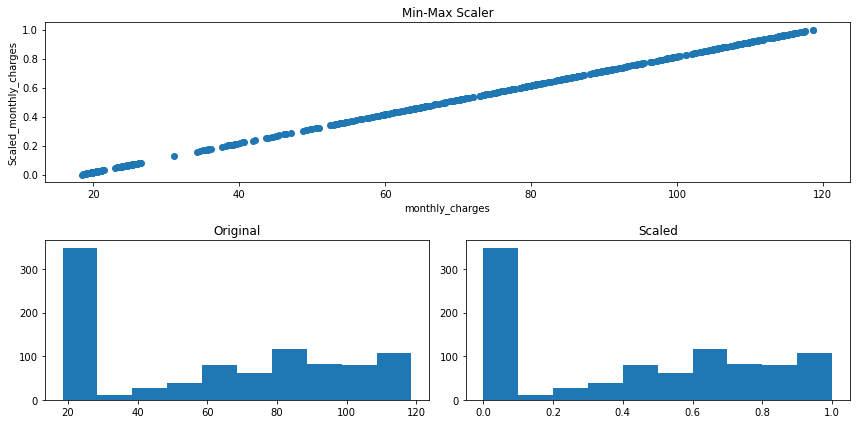

In [12]:
#other way to visualize and see linear relationship
# Define the thing
scaler = sklearn.preprocessing.MinMaxScaler()

# Fit the thing
scaler.fit(train[['monthly_charges']])

#transform
scaled = scaler.transform(train[['monthly_charges']])


# single step to fit and transform
scaled = scaler.fit_transform(train[['monthly_charges']])


fig = plt.figure(figsize = (12,6))

gs = plt.GridSpec(2,2)

ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])

ax1.scatter(train.monthly_charges, scaled)
ax1.set(xlabel = 'monthly_charges', ylabel = 'Scaled_monthly_charges', title = 'Min-Max Scaler')

ax2.hist(train.monthly_charges)
ax2.set(title = 'Original')

ax3.hist(scaled)
ax3.set(title = 'Scaled')
plt.tight_layout();

In [13]:
def visualize_scaled_date(scaler, scaler_name, feature):
    scaled = scaler.fit_transform(train[[feature]])
    fig = plt.figure(figsize = (12,6))

    gs = plt.GridSpec(2,2)

    ax1 = fig.add_subplot(gs[0, :])
    ax2 = fig.add_subplot(gs[1,0])
    ax3 = fig.add_subplot(gs[1,1])

    ax1.scatter(train[[feature]], scaled)
    ax1.set(xlabel = feature, ylabel = 'Scaled_' + feature, title = scaler_name)

    ax2.hist(train[[feature]])
    ax2.set(title = 'Original')

    ax3.hist(scaled)
    ax3.set(title = 'Scaled')
    plt.tight_layout()

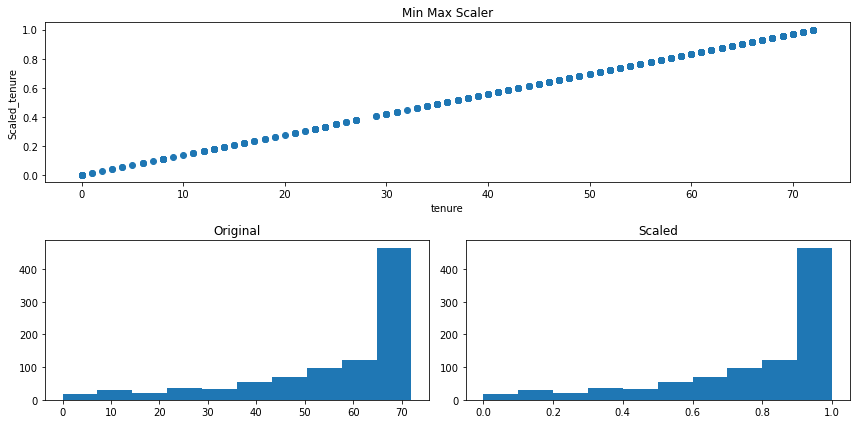

In [14]:
visualize_scaled_date(sklearn.preprocessing.MinMaxScaler(), 'Min Max Scaler', 'tenure')

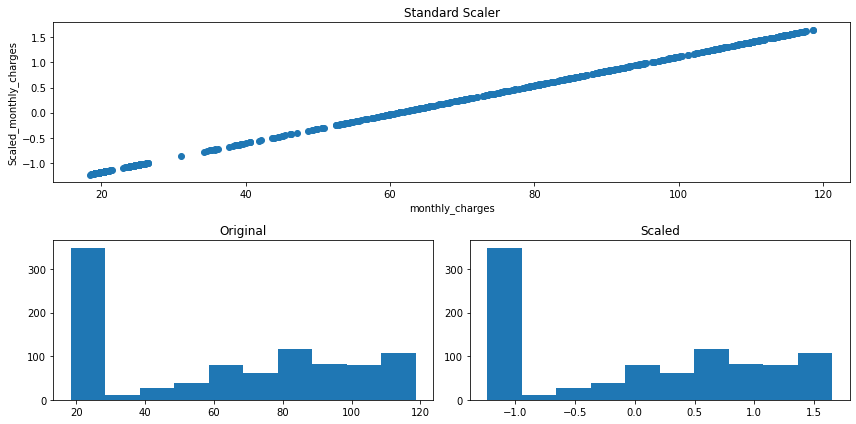

In [15]:
visualize_scaled_date(sklearn.preprocessing.StandardScaler(), 'Standard Scaler', 'monthly_charges')

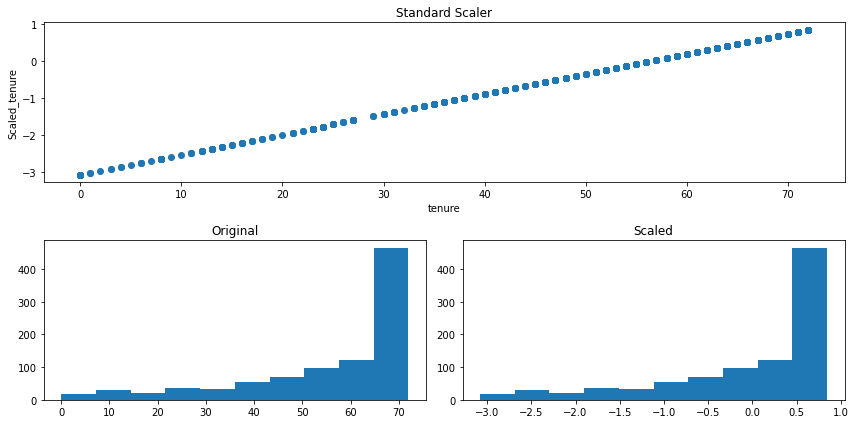

In [16]:
visualize_scaled_date(sklearn.preprocessing.StandardScaler(), 'Standard Scaler', 'tenure')

### 2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [17]:
train.head()

,monthly_charges,total_charges,tenure
customer_id,,,
7501-IWUNG,73.80,4616.05,61
1303-SRDOK,69.05,3842.60,55
3967-VQOGC,24.90,1680.25,67
3777-XROBG,19.55,1079.65,58
5075-JSDKI,24.45,1493.10,59


In [18]:
inverse = scaler.inverse_transform(train_scaled)
inversedf = pd.DataFrame(inverse, columns=train.columns)

inversedf

,monthly_charges,total_charges,tenure
0,54.666135,52.596668,43.017633
1,40.967283,22.761906,10.228673
2,-86.359936,-60.647750,75.806593
3,-101.789169,-83.815063,26.623153
4,-87.657722,-67.866802,32.087980
...,...,...,...
944,144.357562,166.138103,103.130727
945,-31.420332,-11.279309,86.736247
946,-85.783143,-56.418153,103.130727
947,155.172445,63.673081,-38.954767


### 3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.¶

`class sklearn.preprocessing.QuantileTransformer(*, n_quantiles=1000, output_distribution='uniform', ignore_implicit_zeros=False, subsample=100000, random_state=None, copy=True)`

Transform features using quantiles information.

This method transforms the features to follow a uniform or a normal distribution. Therefore, for a given feature, this transformation tends to spread out the most frequent values. It also reduces the impact of (marginal) outliers: this is therefore a robust preprocessing scheme.

The transformation is applied on each feature independently. First an estimate of the cumulative distribution function of a feature is used to map the original values to a uniform distribution. The obtained values are then mapped to the desired output distribution using the associated quantile function. Features values of new/unseen data that fall below or above the fitted range will be mapped to the bounds of the output distribution. Note that this transform is non-linear. It may distort linear correlations between variables measured at the same scale but renders variables measured at different scales more directly comparable.

In [19]:
#make the thing (Quantile Transformer(output_distribution=normal))
scaler = sklearn.preprocessing.QuantileTransformer(output_distribution = 'normal')

#fit the thing 
scaler.fit(train)

#use the thing
train_scaled = scaler.transform(train)
validate_scaled = scaler.transform(validate)
test_scaled = scaler.transform(test)

# turn the numpy arrays into dataframes
train_scaled = pd.DataFrame(train_scaled, columns=train.columns)
validate_scaled = pd.DataFrame(validate_scaled, columns=train.columns)
test_scaled = pd.DataFrame(test_scaled, columns=train.columns)

Text(0.5, 1.0, 'Scaled')

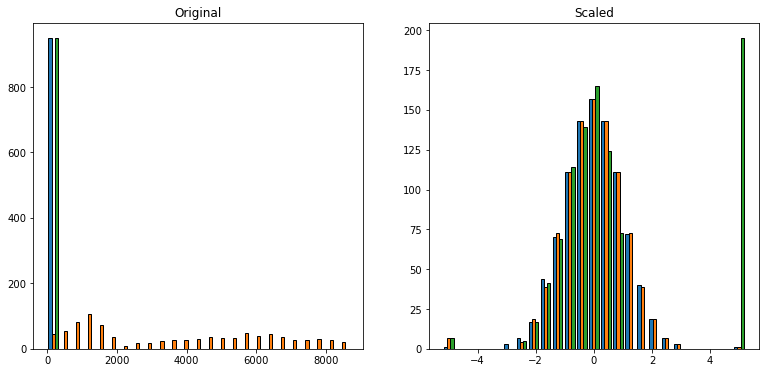

In [20]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_scaled, bins=25, ec='black')
plt.title('Scaled')

Text(0.5, 1.0, 'Scaled Monthly Charges')

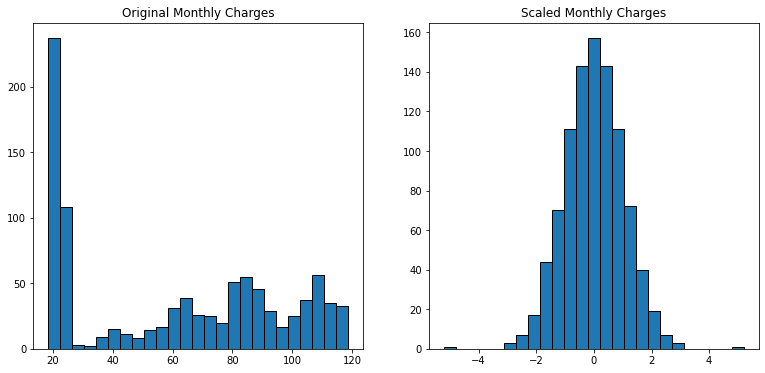

In [21]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train.monthly_charges, bins=25, ec='black')
plt.title('Original Monthly Charges')
plt.subplot(122)
plt.hist(train_scaled.monthly_charges, bins=25, ec='black')
plt.title('Scaled Monthly Charges')

Text(0.5, 1.0, 'Scaled Total Charges')

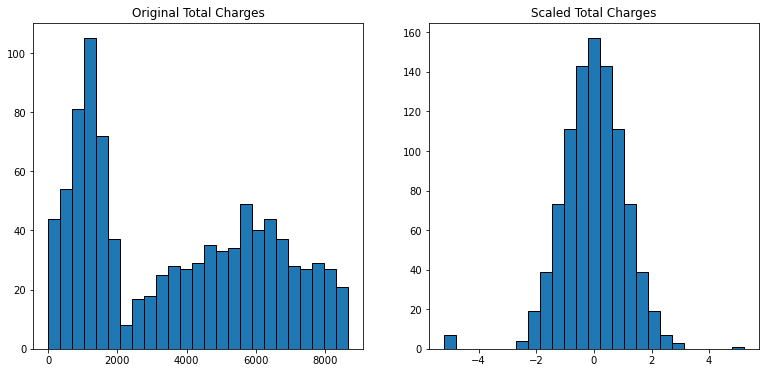

In [22]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train.total_charges, bins=25, ec='black')
plt.title('Original Total Charges')
plt.subplot(122)
plt.hist(train_scaled.total_charges, bins=25, ec='black')
plt.title('Scaled Total Charges')

Text(0.5, 1.0, 'Scaled Tenure')

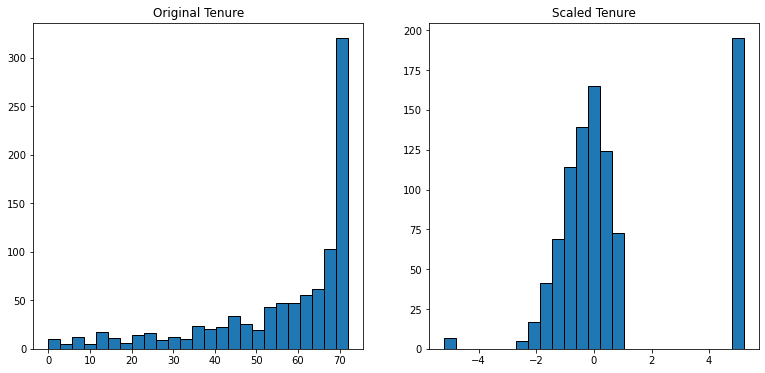

In [23]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train.tenure, bins=25, ec='black')
plt.title('Original Tenure')
plt.subplot(122)
plt.hist(train_scaled.tenure, bins=25, ec='black')
plt.title('Scaled Tenure')

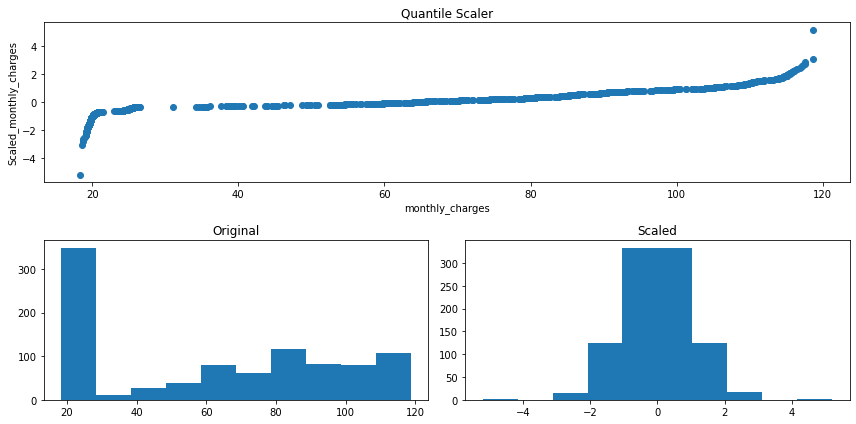

In [24]:
visualize_scaled_date(sklearn.preprocessing.QuantileTransformer(output_distribution='normal'), 'Quantile Scaler', 'monthly_charges')

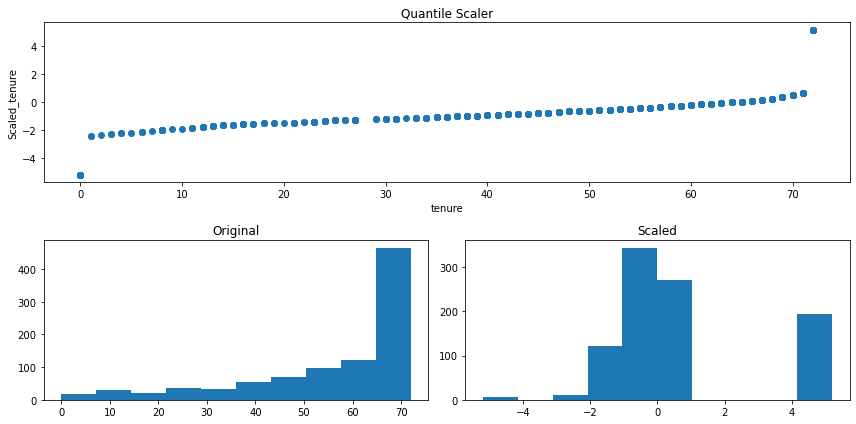

In [25]:
visualize_scaled_date(sklearn.preprocessing.QuantileTransformer(output_distribution='normal'), 'Quantile Scaler', 'tenure')

### 4. Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?


In [26]:
#make the thing (Quantile Transformer)
scaler = sklearn.preprocessing.QuantileTransformer()

#fit the thing 
scaler.fit(train)

#use the thing
train_scaled = scaler.transform(train)
validate_scaled = scaler.transform(validate)
test_scaled = scaler.transform(test)

# turn the numpy arrays into dataframes
train_scaled = pd.DataFrame(train_scaled, columns=train.columns)
validate_scaled = pd.DataFrame(validate_scaled, columns=train.columns)
test_scaled = pd.DataFrame(test_scaled, columns=train.columns)

Text(0.5, 1.0, 'Scaled')

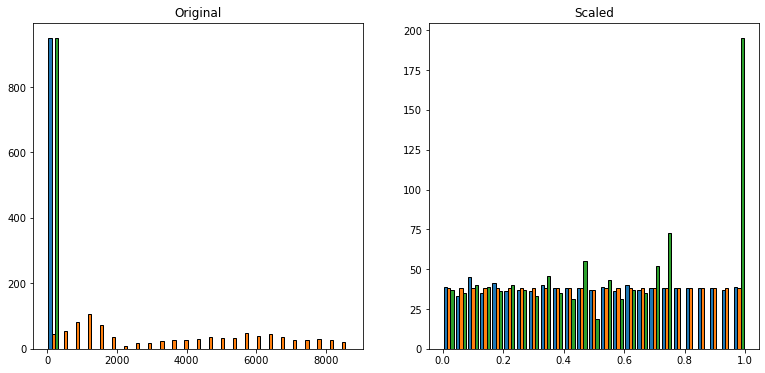

In [27]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(train_scaled, bins=25, ec='black')
plt.title('Scaled')

Text(0.5, 1.0, 'Scaled Monthly Charges')

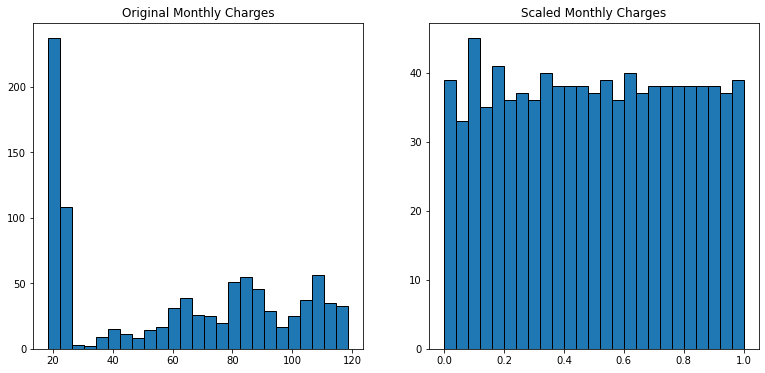

In [28]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train.monthly_charges, bins=25, ec='black')
plt.title('Original Monthly Charges')
plt.subplot(122)
plt.hist(train_scaled.monthly_charges, bins=25, ec='black')
plt.title('Scaled Monthly Charges')

Text(0.5, 1.0, 'Scaled Total Charges')

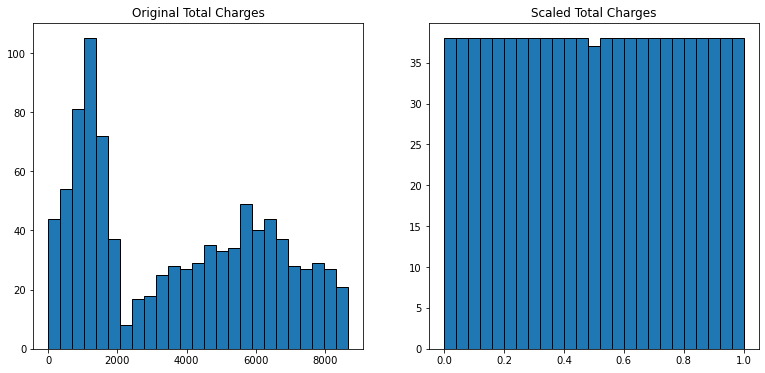

In [29]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train.total_charges, bins=25, ec='black')
plt.title('Original Total Charges')
plt.subplot(122)
plt.hist(train_scaled.total_charges, bins=25, ec='black')
plt.title('Scaled Total Charges')

Text(0.5, 1.0, 'Scaled Tenure')

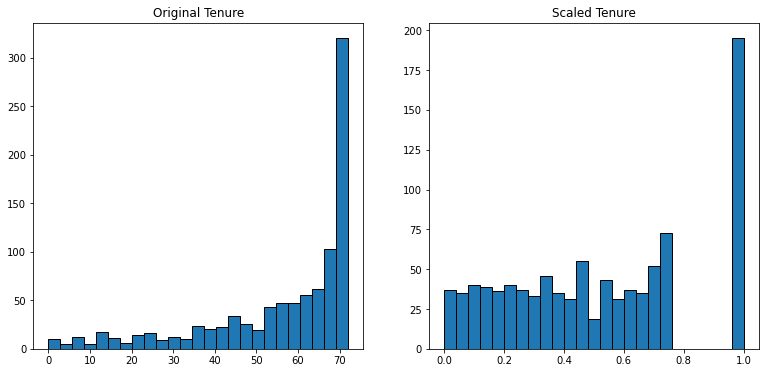

In [30]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train.tenure, bins=25, ec='black')
plt.title('Original Tenure')
plt.subplot(122)
plt.hist(train_scaled.tenure, bins=25, ec='black')
plt.title('Scaled Tenure')

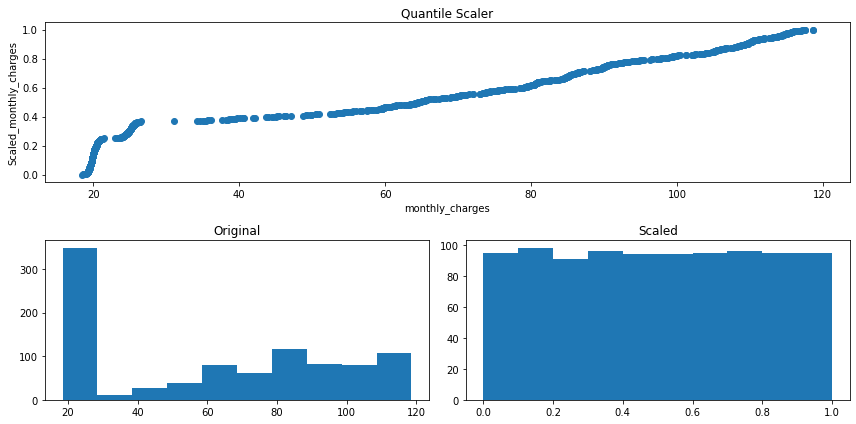

In [31]:
visualize_scaled_date(sklearn.preprocessing.QuantileTransformer(), 'Quantile Scaler', 'monthly_charges')

### 5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data.

In [32]:
def min_max_scaler(train, validate, test):
    '''
    Accepts three dataframes and applies a linear transformer to convert values in each dataframe
    to a value from 0 to 1 while mantaining relative distance between values. 
    Columns containing object data types are dropped, as strings cannot be directly scaled.
    Parameters (train, validate, test) = three dataframes being scaled
    
    Returns (scaler, train_scaled, validate_scaled, test_scaled)
    '''

    #exclude objects
    train = train.select_dtypes(exclude=['object'])
    validate = validate.select_dtypes(exclude=['object'])
    test = test.select_dtypes(exclude=['object'])

    #make
    scaler = sklearn.preprocessing.MinMaxScaler()

    #fit
    scaler.fit(train)

    #use
    train_scaled = scaler.transform(train)
    validate_scaled = scaler.transform(validate)
    test_scaled = scaler.transform(test)

    # turn the numpy arrays into dataframes
    train_scaled = pd.DataFrame(train_scaled, columns=train.columns)
    validate_scaled = pd.DataFrame(validate_scaled, columns=train.columns)
    test_scaled = pd.DataFrame(test_scaled, columns=train.columns)

    return scaler, train_scaled, validate_scaled, test_scaled

In [33]:
# Test Function defined above 
scaler, train_scaled, validate_scaled, test_scaled = min_max_scaler(train, validate, test)

train_scaled.head()

,monthly_charges,total_charges,tenure
0,0.552618,0.532410,0.847222
1,0.505237,0.443201,0.763889
2,0.064838,0.193798,0.930556
3,0.011471,0.124526,0.805556
4,0.060349,0.172213,0.819444


In [34]:
#start from scratch:
df = wrangle_telco()
df = df.set_index("customer_id")
train, validate, test = split(df)

#test function from prepare.py
scaler, train_scaled, validate_scaled, test_scaled = min_max_scaler(train, validate, test)

train_scaled.head()

,monthly_charges,total_charges,tenure
0,0.552618,0.532410,0.847222
1,0.505237,0.443201,0.763889
2,0.064838,0.193798,0.930556
3,0.011471,0.124526,0.805556
4,0.060349,0.172213,0.819444
